# K-means Cluster From Scratch 

In [26]:
import random
import numpy as np

class KMeans:
    
    #step 1: Deciding the number of clusters
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):
        
        #Step 2- Deciding the random centroids
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            #Step 3- assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # Step 4-move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            #Step 5- check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                #Calculating Euclidean Distance for clustering the points
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)
        
        #Calculating new centroid using mean of each cluster group.
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)



## For 2 clusters

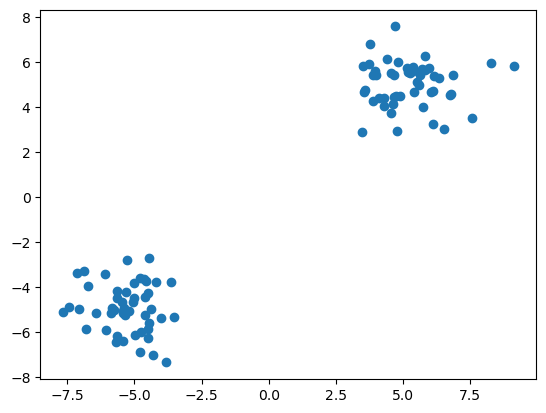

In [27]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import pandas as pd

centroids = [(-5,-5),(5,5)]
cluster_std = [1,1,]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

plt.scatter(X[:,0],X[:,1])


In [28]:

km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

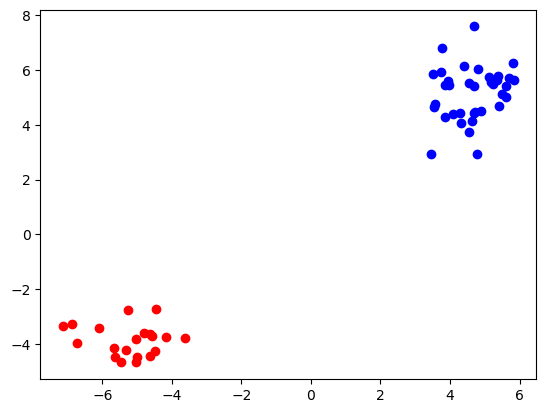

In [29]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.show()

## For 3 Clusters

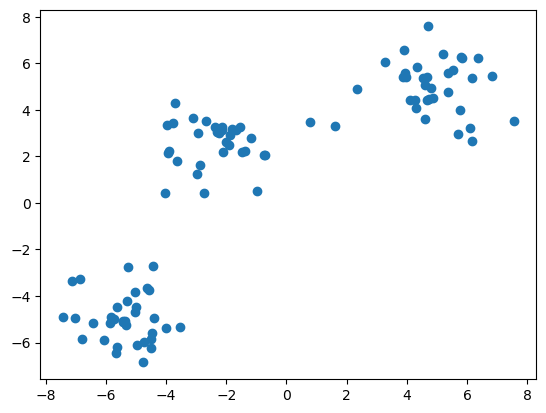

In [31]:
centroids = [(-5,-5),(5,5),(-2.5,2.5)]
cluster_std = [1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

plt.scatter(X[:,0],X[:,1])

In [32]:
km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

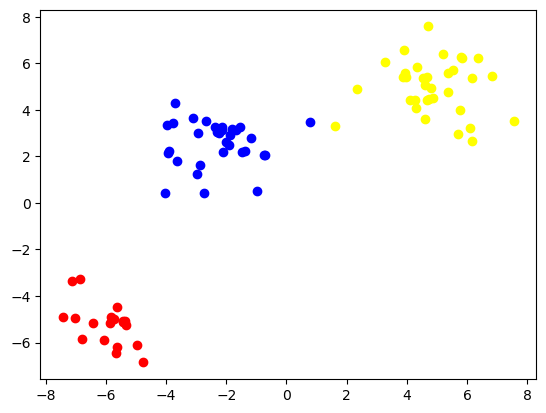

In [33]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='yellow')
plt.show()

## For 4 clusters 

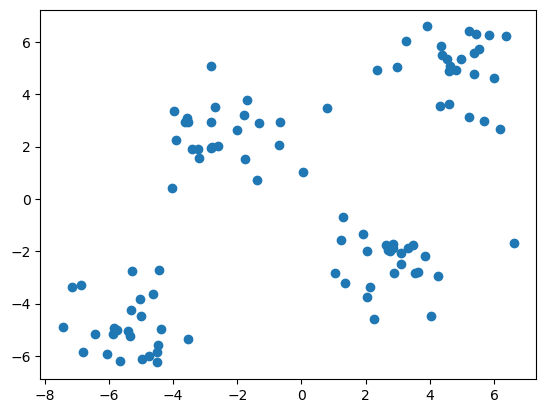

In [35]:
centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

plt.scatter(X[:,0],X[:,1])


In [36]:
km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

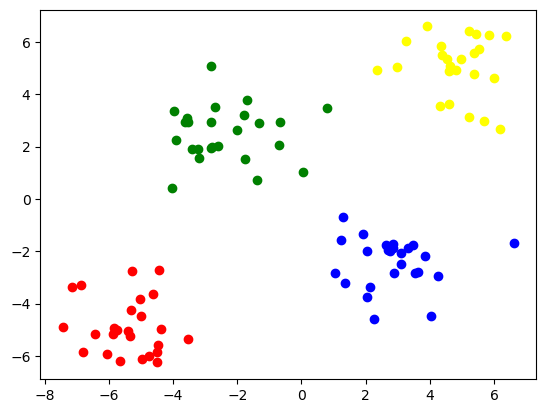

In [37]:

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

### Tuning the max_iteration parameter

In [40]:
km = KMeans(n_clusters=4,max_iter=1)
y_means = km.fit_predict(X)

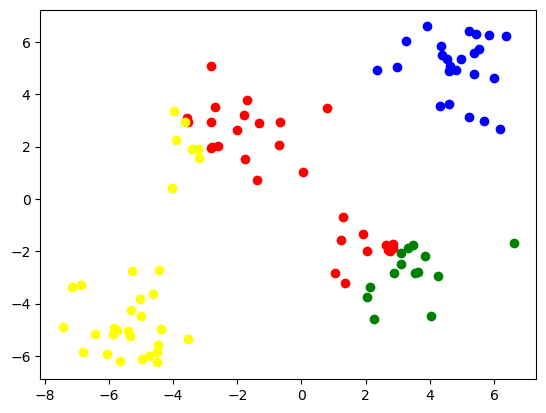

In [41]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

- From above graoh you can see that , when we pass the max_ietration minimum i.r max_iter=1,10etc the algorithm may not be able to classify clusters correctly.
- While When we passes the number of iteration maximum i.e max_iter=100 ,200 etc then algorithm is capable of doing the classification of clusters more correctly and precisely.
- Hence it is important to pass the correct number of iteration in k means clustering algorithm.

## For Real World Dataset

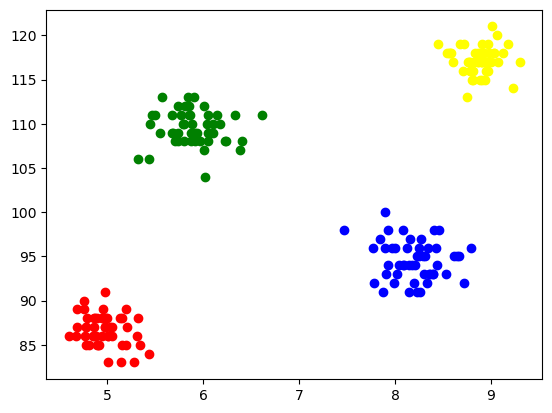

In [45]:
df = pd.read_csv('student_clustering.csv')

X = df.iloc[:,:].values

km = KMeans(n_clusters=4,max_iter=600)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

### Thus We have a successfully created the K-means algorithm from scratch which can work on real world dataset correctly and precisely just like class of Sklearn. 

# Conclude